In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
bom = pd.read_csv('data/bom.movie_gross.csv.gz')
print(bom.shape, '\n')
print(bom.info())
bom.head()

(3387, 5) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
title             3387 non-null object
studio            3382 non-null object
domestic_gross    3359 non-null float64
foreign_gross     2037 non-null object
year              3387 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB
None


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [144]:
imdb_name = pd.read_csv('data/imdb.name.basics.csv.gz')
print(imdb_name.shape, '\n')
print(imdb_name.info())
imdb_name.head()

(606648, 6) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 6 columns):
nconst                606648 non-null object
primary_name          606648 non-null object
birth_year            82736 non-null float64
death_year            6783 non-null float64
primary_profession    555308 non-null object
known_for_titles      576444 non-null object
dtypes: float64(2), object(4)
memory usage: 27.8+ MB
None


,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


In [5]:
imdb_akas = pd.read_csv('data/imdb.title.akas.csv.gz')
print(imdb_akas.shape, '\n')
print(imdb_akas.info())
imdb_akas.head()

(331703, 8) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331703 entries, 0 to 331702
Data columns (total 8 columns):
title_id             331703 non-null object
ordering             331703 non-null int64
title                331703 non-null object
region               278410 non-null object
language             41715 non-null object
types                168447 non-null object
attributes           14925 non-null object
is_original_title    331678 non-null float64
dtypes: float64(1), int64(1), object(6)
memory usage: 20.2+ MB
None


,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0


In [6]:
imdb_basics = pd.read_csv('data/imdb.title.basics.csv.gz')
print(imdb_basics.shape, '\n')
print(imdb_basics.info())
imdb_basics.head()

(146144, 6) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
tconst             146144 non-null object
primary_title      146144 non-null object
original_title     146123 non-null object
start_year         146144 non-null int64
runtime_minutes    114405 non-null float64
genres             140736 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB
None


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [23]:
imdb_basics.genres.unique().size # unique combinations of genres = 1086

1086

In [29]:
imdb_basics.isna().sum() #5408 null values in 'genre'

tconst                 0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [31]:
imdb_cleaned = imdb_basics.dropna(subset=['genres'])

In [32]:
imdb_cleaned.isna().sum()

tconst                 0
primary_title          0
original_title         2
start_year             0
runtime_minutes    28503
genres                 0
dtype: int64

In [33]:
imdb_cleaned['genre_split']= imdb_cleaned['genres'].apply(lambda x: str(x.split()))

/Users/flatironschooldc2/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [34]:
imdb_cleaned.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,genre_split
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama","['Action,Crime,Drama']"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama","['Biography,Drama']"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,['Drama']
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama","['Comedy,Drama']"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy","['Comedy,Drama,Fantasy']"


In [7]:
imdb_crew = pd.read_csv('data/imdb.title.crew.csv.gz')
print(imdb_crew.shape, '\n')
print(imdb_crew.info())
imdb_crew.head()

(146144, 3) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 3 columns):
tconst       146144 non-null object
directors    140417 non-null object
writers      110261 non-null object
dtypes: object(3)
memory usage: 3.3+ MB
None


,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


In [8]:
imdb_principals = pd.read_csv('data/imdb.title.principals.csv.gz')
print(imdb_principals.shape, '\n')
print(imdb_principals.info())
imdb_principals.head()

(1028186, 6) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028186 entries, 0 to 1028185
Data columns (total 6 columns):
tconst        1028186 non-null object
ordering      1028186 non-null int64
nconst        1028186 non-null object
category      1028186 non-null object
job           177684 non-null object
characters    393360 non-null object
dtypes: int64(1), object(5)
memory usage: 47.1+ MB
None


,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


In [9]:
imdb_ratings = pd.read_csv('data/imdb.title.ratings.csv.gz')
print(imdb_ratings.shape, '\n')
print(imdb_ratings.info())
imdb_ratings.head()

(73856, 3) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
tconst           73856 non-null object
averagerating    73856 non-null float64
numvotes         73856 non-null int64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB
None


,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [10]:
rt_info = pd.read_csv('data/rt.movie_info.tsv.gz', delimiter = '\t')
print(rt_info.shape, '\n')
print(rt_info.info())
rt_info.head()

(1560, 12) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
id              1560 non-null int64
synopsis        1498 non-null object
rating          1557 non-null object
genre           1552 non-null object
director        1361 non-null object
writer          1111 non-null object
theater_date    1201 non-null object
dvd_date        1201 non-null object
currency        340 non-null object
box_office      340 non-null object
runtime         1530 non-null object
studio          494 non-null object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB
None


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [11]:
rt_reviews = pd.read_csv('data/rt.reviews.tsv.gz', delimiter = '\t', encoding='windows-1252')
print(rt_reviews.shape, '\n')
print(rt_reviews.info())
rt_reviews.head()

(54432, 8) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
id            54432 non-null int64
review        48869 non-null object
rating        40915 non-null object
fresh         54432 non-null object
critic        51710 non-null object
top_critic    54432 non-null int64
publisher     54123 non-null object
date          54432 non-null object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB
None


,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [12]:
tmdb = pd.read_csv('data/tmdb.movies.csv.gz')
print(tmdb.shape, '\n')
print(tmdb.info())
tmdb.head()

(26517, 10) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
Unnamed: 0           26517 non-null int64
genre_ids            26517 non-null object
id                   26517 non-null int64
original_language    26517 non-null object
original_title       26517 non-null object
popularity           26517 non-null float64
release_date         26517 non-null object
title                26517 non-null object
vote_average         26517 non-null float64
vote_count           26517 non-null int64
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB
None


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [13]:
budgets = pd.read_csv('data/tn.movie_budgets.csv.gz')
print(budgets.shape, '\n')
print(budgets.info())
budgets.head()

(5782, 6) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
id                   5782 non-null int64
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null object
domestic_gross       5782 non-null object
worldwide_gross      5782 non-null object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB
None


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


# Step 1: Build Credibility/Buzz

## Questions:
- Which genres are well-reviewed?
- Which actors are well-reviewed?
- Which directors/writers are well-reviewed?
- Which directors/writers have made low-medium budget movies?
- Which actors have made low-medium budget movies?
- Which MPAA (motion picture assoc. of America) ratings are most successful?

## Metrics:
- Avg rating per genre (critics vs top critics)
- Avg rating per actor (with density plot) for lead actor(s)
- Production budget/rating (cost per rating) grouped by genre
- Production budget/rating (cost per rating) grouped by director
    - Scatterplot: director avg movie rating vs director avg production budget
- Production budget/rating (cost per rating) grouped by actor for rest of cast

# Step 2: Make that Money

## Questions:
- Which genres have the highest profit margin?
- Which actors generate the highest gross earnings?
- Which directors generate the highest gross earnings?

In [49]:
# Clean Rotten Tomatoes dataset
print(rt_info.info())
rt_info.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
id              1560 non-null int64
synopsis        1498 non-null object
rating          1557 non-null object
genre           1552 non-null object
director        1361 non-null object
writer          1111 non-null object
theater_date    1201 non-null object
dvd_date        1201 non-null object
currency        340 non-null object
box_office      340 non-null object
runtime         1530 non-null object
studio          494 non-null object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB
None


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [37]:
print(rt_reviews.info())
rt_reviews.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
id            54432 non-null int64
review        48869 non-null object
rating        40915 non-null object
fresh         54432 non-null object
critic        51710 non-null object
top_critic    54432 non-null int64
publisher     54123 non-null object
date          54432 non-null object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB
None


,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [38]:
rt_reviews_cleaned = rt_reviews.dropna(subset = ['rating'])

In [53]:
rt_reviews_cleaned.rating.unique()
# some ratings with letter values, some without a scale
# let's abandon cleaning this column

array(['3/5', 'C', '2/5', 'B-', '2/4', 'B', '3/4', '4/5', '4/4', '6/10',
       '1/4', '8', '2.5/4', '4/10', '2.0/5', '3/10', '7/10', 'A-', '5/5',
       'F', '3.5/4', 'D+', '1.5/4', '3.5/5', '8/10', 'B+', '9/10',
       '2.5/5', '7.5/10', '5.5/10', 'C-', '1.5/5', '1/5', '5/10', 'C+',
       '0/5', '6', '0.5/4', 'D', '3.1/5', '3/6', '4.5/5', '0/4', '2/10',
       'D-', '7', '1/10', '3', 'A+', 'A', '4.0/4', '9.5/10', '2.5',
       '2.1/2', '6.5/10', '3.7/5', '8.4/10', '9', '1', '7.2/10', '2.2/5',
       '0.5/10', '5', '0', '2', '4.5', '7.7', '5.0/5', '8.5/10', '3.0/5',
       '0.5/5', '1.5/10', '3.0/4', '2.3/10', '4.5/10', '4/6', '3.5',
       '8.6/10', '6/8', '2.0/4', '2.7', '4.2/10', '5.8', '4', '7.1/10',
       '5/4', 'N', '3.5/10', '5.8/10', 'R', '4.0/5', '0/10', '5.0/10',
       '5.9/10', '2.4/5', '1.9/5', '4.9', '7.4/10', '1.5', '2.3/4',
       '8.8/10', '4.0/10', '2.2', '3.8/10', '6.8/10', '7.3', '7.0/10',
       '3.2', '4.2', '8.4', '5.5/5', '6.3/10', '7.6/10', '8.1/10',
       

In [56]:
rt_reviews.fresh.value_counts(normalize=True) # ~60% of ratings 'fresh'

fresh     0.606904
rotten    0.393096
Name: fresh, dtype: float64

In [58]:
rt_reviews['fresh_clean'] = rt_reviews.fresh.apply(lambda x: 1 if 'fresh' in x else 0)

In [64]:
rt_reviews.fresh.value_counts()

fresh     33035
rotten    21397
Name: fresh, dtype: int64

In [65]:
rt_reviews.fresh_clean.value_counts() # 'fresh' and 'fresh_clean' seem to match

1    33035
0    21397
Name: fresh_clean, dtype: int64

In [67]:
rt_reviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date,fresh_clean
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018",1
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018",0
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018",1
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017",1
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017",1


In [66]:
rt_reviews_cleaned.top_critic.value_counts(normalize=True) # ~20% are top critics

0    0.803104
1    0.196896
Name: top_critic, dtype: float64

In [ ]:
# make column for overall critic rating, reg critic rating, and top critic rating


In [82]:
review_count = rt_reviews.groupby('id').count().fresh_clean
# series with review count

In [118]:
top_critic_review_count = rt_reviews.loc[rt_reviews.top_critic == 1].groupby('id').count().fresh_clean
# series with # of top critic ratings

In [117]:
reg_critic_review_count = rt_reviews.loc[rt_reviews.top_critic == 0].groupby('id').count().fresh_clean
# series with # of reg critic ratings

In [87]:
critic_rating = rt_reviews.groupby('id').mean().fresh_clean
# series with overall critic rating

In [86]:
top_critic_rating = rt_reviews.loc[rt_reviews.top_critic == 1].groupby('id').mean().fresh_clean
# series with top critic avg rating

In [88]:
reg_critic_rating = rt_reviews.loc[rt_reviews.top_critic == 0].groupby('id').mean().fresh_clean
# series with reg critic avg rating

In [120]:
print(review_count.size)
print(top_critic_review_count.size)
print(reg_critic_review_count.size)
print(critic_rating.size)
print(top_critic_rating.size)
print(reg_critic_rating.size)

1135
889
1129
1135
889
1129


In [93]:
print(review_count)
print(critic_rating)

id
3       163
5        23
6        57
8        75
10      108
       ... 
1996    143
1997     28
1998      2
1999     46
2000     38
Name: fresh_clean, Length: 1135, dtype: int64
id
3       0.631902
5       0.782609
6       0.561404
8       0.746667
10      0.462963
          ...   
1996    0.671329
1997    0.357143
1998    1.000000
1999    0.586957
2000    0.473684
Name: fresh_clean, Length: 1135, dtype: float64


In [96]:
rt_rating1 = pd.merge(review_count, critic_rating, how = 'outer', on = 'id', suffixes = ('_count', '_overall_rating'))

In [97]:
rt_rating1

,fresh_clean_count,fresh_clean_overall_rating
id,,
3,163,0.631902
5,23,0.782609
6,57,0.561404
8,75,0.746667
10,108,0.462963
...,...,...
1996,143,0.671329
1997,28,0.357143
1998,2,1.000000


In [102]:
top_critic_rating


id
3       0.500000
5       0.200000
6       0.473684
8       0.727273
10      0.428571
          ...   
1995    0.111111
1996    0.605263
1997    0.444444
1999    0.416667
2000    0.538462
Name: fresh_clean, Length: 889, dtype: float64

In [108]:
rt_rating2 = pd.merge(rt_rating1, top_critic_rating, how = 'outer', on = 'id')

In [121]:
rt_rating3 = pd.merge(rt_rating2, reg_critic_rating, how = 'outer', on = 'id', suffixes = ('_top_critic', '_reg_critic'))

In [124]:
rt_rating4 = pd.merge(rt_rating3, top_critic_review_count, how = 'outer', on = 'id')

In [127]:
rt_rating5 = pd.merge(rt_rating4, reg_critic_review_count, how = 'outer', on = 'id', suffixes = ('_top_critic_count', '_reg_critic_count'))

# Merge rt_ratings info with rt_info table

In [130]:
rt_rating5.head()

,fresh_clean_count,fresh_clean_overall_rating,fresh_clean_top_critic,fresh_clean_reg_critic,fresh_clean_top_critic_count,fresh_clean_reg_critic_count
id,,,,,,
3,163,0.631902,0.500000,0.666667,34.0,129.0
5,23,0.782609,0.200000,0.944444,5.0,18.0
6,57,0.561404,0.473684,0.605263,19.0,38.0
8,75,0.746667,0.727273,0.754717,22.0,53.0
10,108,0.462963,0.428571,0.475000,28.0,80.0


In [129]:
rt_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [136]:
rt_join = pd.merge (rt_info, rt_rating5, how = 'right', on = 'id')

In [145]:
rt_join.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,fresh_clean_count,fresh_clean_overall_rating,fresh_clean_top_critic,fresh_clean_reg_critic,fresh_clean_top_critic_count,fresh_clean_reg_critic_count
0,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,163,0.631902,0.500000,0.666667,34.0,129.0
1,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN,23,0.782609,0.200000,0.944444,5.0,18.0
2,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN,57,0.561404,0.473684,0.605263,19.0,38.0
3,8,The year is 1942. As the Allies unite overseas...,PG,Drama|Kids and Family,Jay Russell,Gail Gilchriest,"Mar 3, 2000","Jul 11, 2000",NaN,NaN,95 minutes,Warner Bros. Pictures,75,0.746667,0.727273,0.754717,22.0,53.0
4,10,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,"Jan 11, 2002","Jun 18, 2002",$,"41,032,915",82 minutes,Paramount Pictures,108,0.462963,0.428571,0.475000,28.0,80.0


In [142]:
rt_join.groupby('rating').mean()

,id,fresh_clean_count,fresh_clean_overall_rating,fresh_clean_top_critic,fresh_clean_reg_critic,fresh_clean_top_critic_count,fresh_clean_reg_critic_count
rating,,,,,,,
G,1063.560976,26.121951,0.645036,0.623481,0.663363,9.500000,19.634146
NR,985.777344,10.351562,0.686004,0.745351,0.694351,5.064000,8.003968
PG,1014.343590,42.287179,0.565242,0.516516,0.575877,11.930818,32.726804
PG-13,1074.603865,86.995169,0.481418,0.443394,0.488180,21.939698,65.903382
R,972.383908,56.025287,0.556948,0.516817,0.569995,15.655172,42.555300


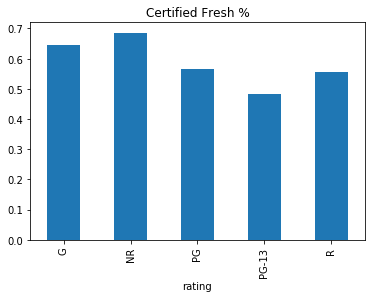

In [155]:
trace = rt_join.groupby('rating').mean()
trace.fresh_clean_overall_rating.plot(kind = 'bar', title = 'Certified Fresh %')

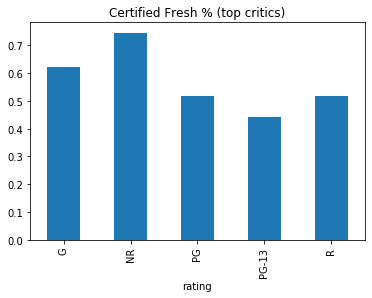

In [156]:
trace.fresh_clean_top_critic.plot(kind = 'bar', title = 'Certified Fresh % (top critics)')

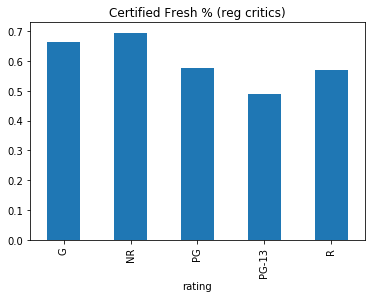

In [158]:
trace.fresh_clean_reg_critic.plot(kind = 'bar', title = 'Certified Fresh % (reg critics)')